In [1]:
import pickle
import numpy as np
def get_accur(filename):
    rd_accuracies = pickle.load(open("./Save/Round_accuracies/" + "Accuracy_for_" + filename + ".p", "rb"))
    return rd_accuracies

In [2]:
exper_name = "n_FMNIST"
trail_0 = get_accur(f'{exper_name}0')
trail_1 = get_accur(f'{exper_name}1')
trail_2 = get_accur(f'{exper_name}2')
trail_3 = get_accur(f'{exper_name}3')
trail_4 = get_accur(f'{exper_name}4')

In [3]:
rand_accur_0 = trail_0['rand']
rand_accur_1 = trail_1['rand']
rand_accur_2 = trail_2['rand']
rand_accur_3 = trail_3['rand']
rand_accur_4 = trail_4['rand']
rand_combined = [rand_accur_0, rand_accur_1, rand_accur_2, rand_accur_3, rand_accur_4]
rand_avg = [(a+b+c+d+e)/5 for a,b,c,d,e in zip(*rand_combined)]

In [4]:
rand_combined = [rand_accur_0, rand_accur_1, rand_accur_2, rand_accur_3]
rand_avg = [(a+b+c+d)/4 for a,b,c,d in zip(*rand_combined)]

In [4]:
entropy_accur_0 = trail_0['entropy']
entropy_accur_0 = entropy_accur_0[2:]   #for FMNIST
entropy_accur_1 = trail_1['entropy']
entropy_accur_2 = trail_2['entropy']
entropy_accur_3 = trail_3['entropy']
entropy_accur_4 = trail_4['entropy']
entropy_combined = [entropy_accur_0, entropy_accur_1, entropy_accur_2, entropy_accur_3, entropy_accur_4]
entropy_avg =[(a+b+c+d+e)/5 for a,b,c,d,e in zip(*entropy_combined)]

In [6]:
entropy_combined = [entropy_accur_0, entropy_accur_1, entropy_accur_2, entropy_accur_3]
entropy_avg =[(a+b+c+d)/4 for a,b,c,d in zip(*entropy_combined)]

In [5]:
bait_accur_0 = trail_0['BAIT']
bait_accur_1 = trail_1['BAIT']
bait_accur_2 = trail_2['BAIT']
bait_accur_3 = trail_3['BAIT']
bait_accur_4 = trail_4['BAIT']
bait_combined = [bait_accur_0, bait_accur_1, bait_accur_2, bait_accur_3, bait_accur_4]
bait_avg = [(a+b+c+d+e)/5 for a,b,c,d,e in zip(*bait_combined)]

In [8]:
bait_combined = [bait_accur_0, bait_accur_1, bait_accur_2, bait_accur_3]
bait_avg = [(a+b+c+d)/4 for a,b,c,d in zip(*bait_combined)]

In [6]:
margin_accur_0 = trail_0['margin']
margin_accur_1 = trail_1['margin']
margin_accur_2 = trail_2['margin']
margin_accur_3 = trail_3['margin']
margin_accur_4 = trail_4['margin']
margin_combined = [margin_accur_0, margin_accur_1, margin_accur_2, margin_accur_3, margin_accur_4]
margin_avg = [(a+b+c+d+e)/5 for a,b,c,d,e in zip(*margin_combined)]

In [14]:
margin_combined = [margin_accur_0, margin_accur_1, margin_accur_2, margin_accur_3]
margin_avg = [(a+b+c+d)/4 for a,b,c,d in zip(*margin_combined)]

In [7]:
fish_accur_0 = trail_0['FISH']
# fish_accur_0 = fish_accur_0[1:]   #for SVHN
fish_accur_1 = trail_1['FISH']
fish_accur_2 = trail_2['FISH']
fish_accur_3 = trail_3['FISH']
fish_accur_4 = trail_4['FISH']
fish_combined = [fish_accur_0, fish_accur_1, fish_accur_2, fish_accur_3, fish_accur_4]
fish_avg = [(a+b+c+d+e)/5 for a,b,c,d,e in zip(*fish_combined)]

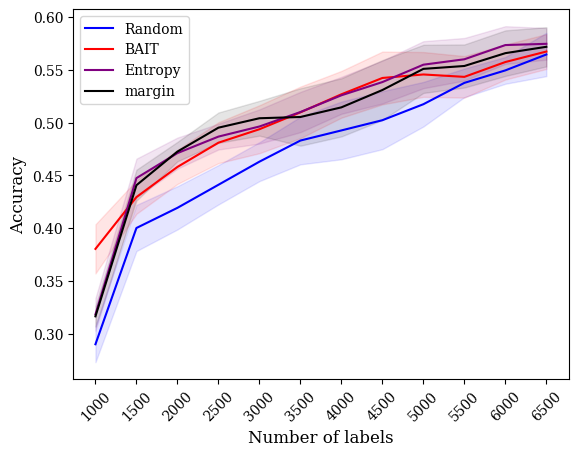

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

# Function to perform simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# This graph is for 5 trails of filename=n_CIFAR and for 4 trails because BAIT is not yet done with the last trail and without FISH
#   if type(optimizer) == int: optimizer = optim.Adam(self.clf.parameters(),lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)   #previously it was 0

rand_avg = np.mean(rand_combined, axis=0)
rand_std = np.std(rand_combined, axis=0)
entropy_avg = np.mean(entropy_combined, axis = 0)
entropy_std = np.std(entropy_combined, axis =0)
BAIT_avg = np.mean(bait_combined, axis = 0)
BAIT_std = np.std(bait_combined, axis =0)
# fish_avg = np.mean(fish_combined, axis = 0)
# fish_std = np.std(fish_combined, axis =0)
margin_avg = np.mean(margin_combined, axis = 0)
margin_std = np.std(margin_combined, axis=0)

# Define the window size for moving average
window_size = 3

# Perform moving average and standard deviation smoothing
rand_avg_smooth = moving_average(rand_avg, window_size)
rand_std_smooth = moving_average(rand_std, window_size)
entropy_avg_smooth = moving_average(entropy_avg, window_size)
entropy_std_smooth = moving_average(entropy_std, window_size)
BAIT_avg_smooth = moving_average(BAIT_avg, window_size)
BAIT_std_smooth = moving_average(BAIT_std, window_size)
# fish_avg_smooth = moving_average(fish_avg, window_size)
# fish_std_smooth = moving_average(fish_std, window_size)
margin_avg_smooth = moving_average(margin_avg, window_size)
margin_std_smooth = moving_average(margin_std, window_size)
# lcs_avg_smooth = moving_average(lcs_avg, window_size)
# lcs_std_smooth = moving_average(lcs_std, window_size)

x = np.arange(window_size//2, len(rand_avg)-window_size//2)
# Define the x-values
x_values = [500,  1000, 1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000, 5500, 6000, 6500, 7000, 7500, 8000]
plt.xticks(range(len(x_values)), x_values, rotation=45)

# Create the plot with a solid line
plt.plot(x, rand_avg_smooth, label='Random', color='blue')
plt.fill_between(x, rand_avg_smooth - rand_std_smooth, rand_avg_smooth + rand_std_smooth, color='blue', alpha=0.1)

plt.plot(x, BAIT_avg_smooth, label='BAIT', color='red')
plt.fill_between(x, BAIT_avg_smooth - BAIT_std_smooth, BAIT_avg_smooth + BAIT_std_smooth, color='red', alpha=0.1)

plt.plot(x, entropy_avg_smooth, label='Entropy', color='purple')
plt.fill_between(x, entropy_avg_smooth - entropy_std_smooth, entropy_avg_smooth + entropy_std_smooth, color='purple', alpha=0.1)

# plt.plot(x, fish_avg_smooth, label='Fisher_mask', color='green')
# plt.fill_between(x, fish_avg_smooth - fish_std_smooth, fish_avg_smooth + fish_std_smooth, color='green', alpha=0.1)

plt.plot(x, margin_avg_smooth, label='margin', color='black')
plt.fill_between(x, margin_avg_smooth - margin_std_smooth, margin_avg_smooth + margin_std_smooth, color='black', alpha=0.1)

plt.xlabel('Number of labels', fontsize=12, fontfamily='serif')
plt.ylabel('Accuracy', fontsize=12, fontfamily='serif')
# plt.title('Accuracy for 5000 images averaged over 5 trails')
plt.legend()

# Show the plot
plt.show()



In [25]:
rand_avg        #kcent_avg=[0.1, 0.39 0.42 0.45 0.47 0.5 0.5 0.51 0.53 0.54 0.55 0.56]

array([0.099775, 0.369775, 0.4017  , 0.429475, 0.42695 , 0.467075,
       0.495025, 0.486875, 0.495775, 0.524025, 0.5322  , 0.556325,
       0.55945 , 0.577275])

In [29]:
fish_std

array([0.00929266, 0.01862605, 0.01220072, 0.0160254 , 0.03018642,
       0.01867775, 0.01501714, 0.01422884, 0.01448359, 0.02069883,
       0.01961605, 0.03256483, 0.02440284, 0.01617467])

In [26]:
BAIT_avg[0] = 0.1

In [28]:
BAIT_std

array([0.0294223 , 0.02748512, 0.01269882, 0.00731454, 0.02828139,
       0.02240273, 0.01735099, 0.03332765, 0.01560118, 0.02593332,
       0.02205815, 0.01089756, 0.01671023, 0.0217896 ])

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

# Function to perform simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# This graph is for 5 trails of filename=n_CIFAR and for 4 trails because BAIT is not yet done with the last trail and without FISH
#   if type(optimizer) == int: optimizer = optim.Adam(self.clf.parameters(),lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)   #previously it was 0

rand_avg = np.mean(rand_combined, axis=0)
rand_std = np.std(rand_combined, axis=0)
entropy_avg = np.mean(entropy_combined, axis = 0)
entropy_std = np.std(entropy_combined, axis =0)
BAIT_avg = np.mean(bait_combined, axis = 0)
BAIT_std = np.std(bait_combined, axis =0)
fish_avg = np.mean(fish_combined, axis = 0)
fish_std = np.std(fish_combined, axis =0)
margin_avg = np.mean(margin_combined, axis = 0)
margin_std = np.std(margin_combined, axis=0)

In [49]:
kcent_avg_smooth=[0.3, 0.39, 0.44, 0.46, 0.47, 0.5, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57]  #for CIFAR10
kcent_std_smooth = [0.02, 0.02, 0.01, 0.02, 0.02, 0.017, 0.027, 0.021, 0.025,0.028, 0.022 ,0.03]
kcent_avg_smooth = np.array(kcent_avg_smooth)
kcent_std_smooth = np.array(kcent_std_smooth)

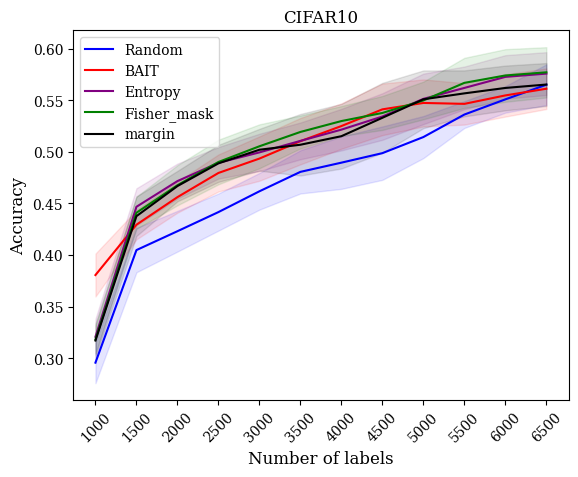

In [8]:
# Define the window size for moving average
window_size = 3

# Perform moving average and standard deviation smoothing
rand_avg_smooth = moving_average(rand_avg, window_size)
rand_std_smooth = moving_average(rand_std, window_size)
entropy_avg_smooth = moving_average(entropy_avg, window_size)
entropy_std_smooth = moving_average(entropy_std, window_size)
BAIT_avg_smooth = moving_average(BAIT_avg, window_size)
BAIT_std_smooth = moving_average(BAIT_std, window_size)
fish_avg_smooth = moving_average(fish_avg, window_size)
fish_std_smooth = moving_average(fish_std, window_size)
margin_avg_smooth = moving_average(margin_avg, window_size)
margin_std_smooth = moving_average(margin_std, window_size)


x = np.arange(window_size//2, len(rand_avg)-window_size//2)
# Define the x-values
x_values = [500,  1000, 1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000, 5500, 6000, 6500, 7000, 7500, 8000]
plt.xticks(range(len(x_values)), x_values, rotation=45)

# Create the plot with a solid line
plt.plot(x, rand_avg_smooth, label='Random', color='blue')
plt.fill_between(x, rand_avg_smooth - rand_std_smooth, rand_avg_smooth + rand_std_smooth, color='blue', alpha=0.1)

plt.plot(x, BAIT_avg_smooth, label='BAIT', color='red')
plt.fill_between(x, BAIT_avg_smooth - BAIT_std_smooth, BAIT_avg_smooth + BAIT_std_smooth, color='red', alpha=0.1)

plt.plot(x, entropy_avg_smooth, label='Entropy', color='purple')
plt.fill_between(x, entropy_avg_smooth - entropy_std_smooth, entropy_avg_smooth + entropy_std_smooth, color='purple', alpha=0.1)

plt.plot(x, fish_avg_smooth, label='Fisher_mask', color='green')
plt.fill_between(x, fish_avg_smooth - fish_std_smooth, fish_avg_smooth + fish_std_smooth, color='green', alpha=0.1)


plt.plot(x, kcent_avg_smooth, label='kcenter', color='orange')
plt.fill_between(x, kcent_avg_smooth - kcent_std_smooth, kcent_avg_smooth + kcent_std_smooth, color='orange', alpha=0.1)

plt.plot(x, margin_avg_smooth, label='margin', color='black')
plt.fill_between(x, margin_avg_smooth - margin_std_smooth, margin_avg_smooth + margin_std_smooth, color='black', alpha=0.1)

plt.xlabel('Number of labels', fontsize=12, fontfamily='serif')
plt.ylabel('Accuracy', fontsize=12, fontfamily='serif')
plt.title('CIFAR10')
plt.legend()

# Show the plot
plt.show()



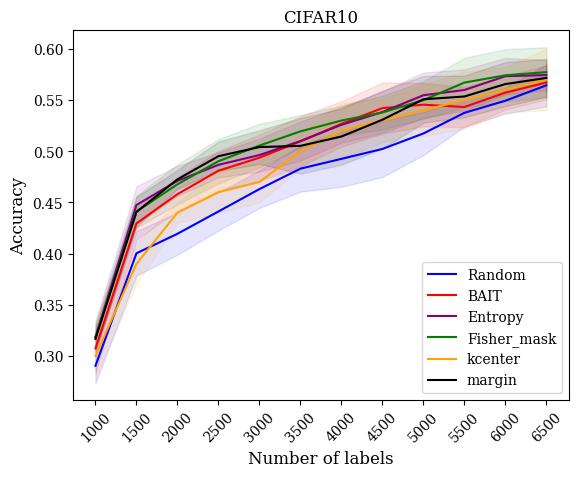

In [50]:
# Define the window size for moving average
window_size = 3

# Perform moving average and standard deviation smoothing
rand_avg_smooth = moving_average(rand_avg, window_size)
rand_std_smooth = moving_average(rand_std, window_size)
entropy_avg_smooth = moving_average(entropy_avg, window_size)
entropy_std_smooth = moving_average(entropy_std, window_size)
BAIT_avg_smooth = moving_average(BAIT_avg, window_size)
BAIT_std_smooth = moving_average(BAIT_std, window_size)
fish_avg_smooth = moving_average(fish_avg, window_size)
fish_std_smooth = moving_average(fish_std, window_size)
margin_avg_smooth = moving_average(margin_avg, window_size)
margin_std_smooth = moving_average(margin_std, window_size)
# lcs_avg_smooth = moving_average(lcs_avg, window_size)
# lcs_std_smooth = moving_average(lcs_std, window_size)

x = np.arange(window_size//2, len(rand_avg)-window_size//2)
# Define the x-values
x_values = [500,  1000, 1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000, 5500, 6000, 6500, 7000, 7500, 8000]
plt.xticks(range(len(x_values)), x_values, rotation=45)

# Create the plot with a solid line
plt.plot(x, rand_avg_smooth, label='Random', color='blue')
plt.fill_between(x, rand_avg_smooth - rand_std_smooth, rand_avg_smooth + rand_std_smooth, color='blue', alpha=0.1)

plt.plot(x, BAIT_avg_smooth, label='BAIT', color='red')
plt.fill_between(x, BAIT_avg_smooth - BAIT_std_smooth, BAIT_avg_smooth + BAIT_std_smooth, color='red', alpha=0.1)

plt.plot(x, entropy_avg_smooth, label='Entropy', color='purple')
plt.fill_between(x, entropy_avg_smooth - entropy_std_smooth, entropy_avg_smooth + entropy_std_smooth, color='purple', alpha=0.1)

plt.plot(x, margin_avg_smooth, label='margin', color='black')
plt.fill_between(x, margin_avg_smooth - margin_std_smooth, margin_avg_smooth + margin_std_smooth, color='black', alpha=0.1)


plt.plot(x, kcent_avg_smooth, label='kcenter', color='orange')
plt.fill_between(x, kcent_avg_smooth - kcent_std_smooth, kcent_avg_smooth + kcent_std_smooth, color='orange', alpha=0.1)

plt.plot(x, fish_avg_smooth, label='Fisher_mask', color='green')
plt.fill_between(x, fish_avg_smooth - fish_std_smooth, fish_avg_smooth + fish_std_smooth, color='green', alpha=0.1)

plt.xlabel('Number of labels', fontsize=12, fontfamily='serif')
plt.ylabel('Accuracy', fontsize=12, fontfamily='serif')
plt.title('CIFAR10')
plt.legend()

# Show the plot
plt.show()



In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

# Function to perform simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# This graph is for 5 trails of filename=n_SVHN and complete checkpoints of all 5 algos with pct_top= 0.002
#   if type(optimizer) == int: optimizer = optim.Adam(self.clf.parameters(),lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)   #previously it was 0

rand_avg = np.mean(rand_combined, axis=0)
rand_std = np.std(rand_combined, axis=0)
entropy_avg = np.mean(entropy_combined, axis = 0)
entropy_std = np.std(entropy_combined, axis =0)
BAIT_avg = np.mean(bait_combined, axis = 0)
BAIT_std = np.std(bait_combined, axis =0)
fish_avg = np.mean(fish_combined, axis = 0)
fish_std = np.std(fish_combined, axis =0)
margin_avg = np.mean(margin_combined, axis = 0)
margin_std = np.std(margin_combined, axis=0)

# Define the window size for moving average
window_size = 3

# Perform moving average and standard deviation smoothing
rand_avg_smooth = moving_average(rand_avg, window_size)
rand_std_smooth = moving_average(rand_std, window_size)
entropy_avg_smooth = moving_average(entropy_avg, window_size)
entropy_std_smooth = moving_average(entropy_std, window_size)
BAIT_avg_smooth = moving_average(BAIT_avg, window_size)
BAIT_std_smooth = moving_average(BAIT_std, window_size)
fish_avg_smooth = moving_average(fish_avg, window_size)
fish_std_smooth = moving_average(fish_std, window_size)
margin_avg_smooth = moving_average(margin_avg, window_size)
margin_std_smooth = moving_average(margin_std, window_size)
# lcs_avg_smooth = moving_average(lcs_avg, window_size)
# lcs_std_smooth = moving_average(lcs_std, window_size)

In [16]:
margin_avg_smooth

array([0.28569333, 0.47197333, 0.62951333, 0.70869333, 0.75398   ,
       0.78407333, 0.80263333, 0.80801333, 0.81219333, 0.81417333,
       0.81344   , 0.81645333])

In [20]:
kcent_avg_smooth =[0.3, 0.43, 0.59, 0.69, 0.73, 0.76, 0.79, 0.80, 0.80, 0.801, 0.81, 0.81]
kcent_std_smooth = [0.02, 0.02, 0.01, 0.02, 0.02, 0.017, 0.027, 0.021, 0.025,0.028, 0.022 ,0.03]
kcent_avg_smooth = np.array(kcent_avg_smooth)
kcent_std_smooth = np.array(kcent_std_smooth)

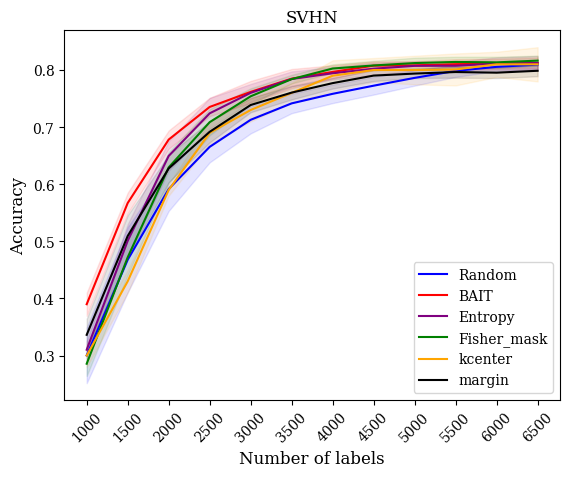

In [22]:


x = np.arange(window_size//2, len(rand_avg)-window_size//2)
# Define the x-values
x_values = [500,  1000, 1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000, 5500, 6000, 6500, 7000, 7500]
plt.xticks(range(len(x_values)), x_values, rotation=45)

# Create the plot with a solid line
plt.plot(x, rand_avg_smooth, label='Random', color='blue')
plt.fill_between(x, rand_avg_smooth - rand_std_smooth, rand_avg_smooth + rand_std_smooth, color='blue', alpha=0.1)

plt.plot(x, BAIT_avg_smooth, label='BAIT', color='red')
plt.fill_between(x, BAIT_avg_smooth - BAIT_std_smooth, BAIT_avg_smooth + BAIT_std_smooth, color='red', alpha=0.1)

plt.plot(x, entropy_avg_smooth, label='Entropy', color='purple')
plt.fill_between(x, entropy_avg_smooth - entropy_std_smooth, entropy_avg_smooth + entropy_std_smooth, color='purple', alpha=0.1)

plt.plot(x, margin_avg_smooth, label='Fisher_mask', color='green')
plt.fill_between(x, margin_avg_smooth - margin_std_smooth, margin_avg_smooth + margin_std_smooth, color='green', alpha=0.1)

plt.plot(x, kcent_avg_smooth, label='kcenter', color='orange')
plt.fill_between(x, kcent_avg_smooth - kcent_std_smooth, kcent_avg_smooth + kcent_std_smooth, color='orange', alpha=0.1)

plt.plot(x, fish_avg_smooth,   label='margin', color='black')
plt.fill_between(x, fish_avg_smooth - fish_std_smooth, fish_avg_smooth + fish_std_smooth, color='black', alpha=0.1)

plt.xlabel('Number of labels', fontsize=12, fontfamily='serif')
plt.ylabel('Accuracy', fontsize=12, fontfamily='serif')
plt.title('SVHN')
plt.legend()

# Show the plot
plt.show()



In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

# Function to perform simple moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# This graph is for 5 trails of filename=n_FMNIST and complete checkpoints of all 5 algos with pct_top= 0.003
#   if type(optimizer) == int: optimizer = optim.Adam(self.clf.parameters(),lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)   #previously it was 0

rand_avg = np.mean(rand_combined, axis=0)
rand_std = np.std(rand_combined, axis=0)
entropy_avg = np.mean(entropy_combined, axis = 0)
entropy_std = np.std(entropy_combined, axis =0)
BAIT_avg = np.mean(bait_combined, axis = 0)
BAIT_std = np.std(bait_combined, axis =0)
fish_avg = np.mean(fish_combined, axis = 0)
fish_std = np.std(fish_combined, axis =0)
margin_avg = np.mean(margin_combined, axis = 0)
margin_std = np.std(margin_combined, axis=0)

# Define the window size for moving average
window_size = 3

# Perform moving average and standard deviation smoothing
rand_avg_smooth = moving_average(rand_avg, window_size)
rand_std_smooth = moving_average(rand_std, window_size)
entropy_avg_smooth = moving_average(entropy_avg, window_size)
entropy_std_smooth = moving_average(entropy_std, window_size)
BAIT_avg_smooth = moving_average(BAIT_avg, window_size)
BAIT_std_smooth = moving_average(BAIT_std, window_size)
fish_avg_smooth = moving_average(fish_avg, window_size)
fish_std_smooth = moving_average(fish_std, window_size)
margin_avg_smooth = moving_average(margin_avg, window_size)
margin_std_smooth = moving_average(margin_std, window_size)
# lcs_avg_smooth = moving_average(lcs_avg, window_size)
# lcs_std_smooth = moving_average(lcs_std, window_size)


In [12]:
BAIT_avg_smooth[0] = 0.53

In [11]:
entropy_avg_smooth

array([0.53937333, 0.77774667, 0.80676667, 0.82043333, 0.82648   ,
       0.83214667, 0.83426667, 0.83262667, 0.83313333, 0.83064   ,
       0.83262667, 0.83334667])

In [15]:
kcent_avg_smooth= [0.52, 0.76, 0.79, 0.81, 0.81, 0.82,0.822, 0.825, 0.83, 0.83, 0.82, 0.83]
kcent_std_smooth = [0.02, 0.02, 0.01, 0.02, 0.02, 0.017, 0.027, 0.021, 0.025,0.028, 0.022 ,0.03]
kcent_avg_smooth = np.array(kcent_avg_smooth)
kcent_std_smooth = np.array(kcent_std_smooth)

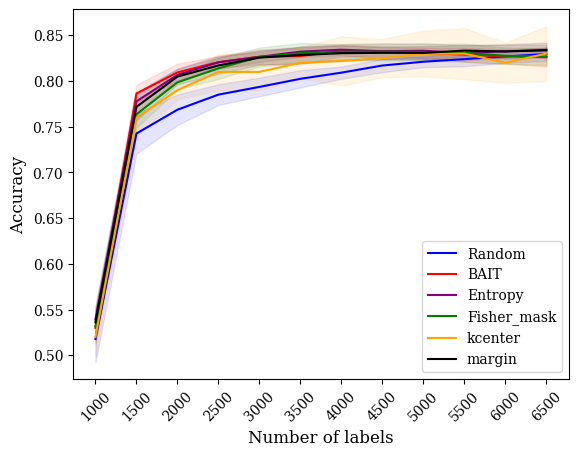

In [16]:

x = np.arange(window_size//2, len(rand_avg)-window_size//2)
# Define the x-values
x_values = [500,  1000, 1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000, 5500, 6000, 6500, 7000, 7500]
plt.xticks(range(len(x_values)), x_values, rotation=45)

# Create the plot with a solid line
plt.plot(x, rand_avg_smooth, label='Random', color='blue')
plt.fill_between(x, rand_avg_smooth - rand_std_smooth, rand_avg_smooth + rand_std_smooth, color='blue', alpha=0.1)

plt.plot(x, BAIT_avg_smooth, label='BAIT', color='red')
plt.fill_between(x, BAIT_avg_smooth - BAIT_std_smooth, BAIT_avg_smooth + BAIT_std_smooth, color='red', alpha=0.1)

plt.plot(x, entropy_avg_smooth, label='Entropy', color='purple')
plt.fill_between(x, entropy_avg_smooth - entropy_std_smooth, entropy_avg_smooth + entropy_std_smooth, color='purple', alpha=0.1)

plt.plot(x, fish_avg_smooth, label='Fisher_mask', color='green')
plt.fill_between(x, fish_avg_smooth - fish_std_smooth, fish_avg_smooth + fish_std_smooth, color='green', alpha=0.1)


plt.plot(x, kcent_avg_smooth, label='kcenter', color='orange')
plt.fill_between(x, kcent_avg_smooth - kcent_std_smooth, kcent_avg_smooth + kcent_std_smooth, color='orange', alpha=0.1)

plt.plot(x, margin_avg_smooth, label='margin', color='black')
plt.fill_between(x, margin_avg_smooth - margin_std_smooth, margin_avg_smooth + margin_std_smooth, color='black', alpha=0.1)

plt.xlabel('Number of labels', fontsize=12, fontfamily='serif')
plt.ylabel('Accuracy', fontsize=12, fontfamily='serif')
# plt.title('FashionMNIST')
plt.legend()

# Show the plot
plt.show()



In [13]:
rand_avg_smooth = [round(num,2) for num in rand_avg_smooth]
BAIT_avg_smooth = [round(num,2) for num in BAIT_avg_smooth]
fish_avg_smooth = [round(num,2) for num in fish_avg_smooth]
margin_avg_smooth = [round(num,2) for num in margin_avg_smooth]
entropy_avg_smooth = [round(num,2) for num in entropy_avg_smooth]
print(rand_avg_smooth)
print(BAIT_avg_smooth)
print(margin_avg_smooth)
print(entropy_avg_smooth)
print(fish_avg_smooth)

[0.52, 0.74, 0.77, 0.79, 0.79, 0.8, 0.81, 0.82, 0.82, 0.82, 0.83, 0.83]
[0.72, 0.79, 0.81, 0.82, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]
[0.54, 0.77, 0.8, 0.82, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]
[0.54, 0.78, 0.81, 0.82, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]
[0.53, 0.76, 0.8, 0.81, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]
